# Version 0.3

Change the calculation methods for v_score and r_score. 
Select a strategy with a probability instead of selecting the best directly.

Only simulate for one sample at this time. Plot the number of people in bar and the r_score history, with different number of strateties and memory steps.

## No strategy

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint

N = 1001
iter_num = 1500
bar_people_num = np.zeros(iter_num)
home_num = np.zeros(iter_num)
for i in range(iter_num):
    for j in range(N):
        rd = randint(0, 1)
        if(rd == 1):
            bar_people_num[i] += 1
        else:
            home_num[i] += 1

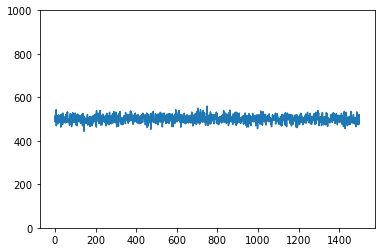

In [2]:
t_ax = [i for i in range(iter_num)]
plt.plot(t_ax, bar_people_num)
plt.ylim([0, 1000])
plt.show()

## With short-term memory

In [3]:
#number of agents
N=500

# num of strategies
s_list=[2,5,10,20]

# num of memory steps
m_list=[3,5,10,15]

In [4]:
"""
CHEN Xiaolong
2021.11.19
Class Encapsulate
El-Farol Bar problem
"""
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
from random import choice
from random import choices
class BarGame():
    def __init__(self, iter_num=1000, N=101, m=3, s=2, cal_benefit=0):
        self.iter_num = iter_num
        self.N = N
        self.m = m
        self.s = s
        self.dim = 2**m
        self.cal_benefit = cal_benefit
        self.d_arr = np.random.randint(0, 2, (N, s, self.dim))
        self.v_score = np.zeros((N, s))
        self.r_score = np.zeros(N)
        self.num_bar = []
        self.r_score_history = [[] for i in range(N)]
    
    def runGame(self):
        mu = randint(0, self.dim-1)
        N = self.N
        decision = np.zeros(N)
        for i in range(self.iter_num):
            num_going = 0
            for ag in range(N):
                # find the best strategy 
                maxv = self.v_score[ag][0]
                choice_s = []
                for st in range(self.s):
                    if self.v_score[ag][st] > maxv:
                        maxv = self.v_score[ag][st]
                        choice_s.append(st)
                    elif self.v_score[ag][st] == maxv:
                        choice_s.append(st)
                cur_choice = choice(choice_s)
                decision[ag] = self.d_arr[ag][cur_choice][mu]
                if decision[ag] == 1:
                    num_going += 1
            self.num_bar.append(num_going)
            if self.cal_benefit == 0:
                benefit = self.calBenefit_0(num_going, N)
            else:
                benefit = self.calBenefit_1(num_going, N)
            w = 1 if benefit < 1 else 0
            for ag in range(N):
                for i in range(self.s):
                    if self.d_arr[ag][i][mu] == 1: # if go to bar, v_score add by benefit
                        self.v_score[ag][i] += benefit#*(self.d_arr[ag][i][mu]) 
                    elif self.d_arr[ag][i][mu] == 0: # if stay at home, v_score always add 1
                        self.v_score[ag][i] += 1
                if decision[ag] == 1:
                    self.r_score[ag] += benefit#*(decision[ag])
                elif decision[ag] == 0:    
                    self.r_score[ag] += 1
                self.r_score_history[ag].append(self.r_score[ag])
            mu = (mu*2+w)%self.dim 
            
    def calBenefit_0(self, num_going, N):
        if num_going - int(N*0.6) > 0:  # if crowded, benefit < 1
            return 1 - 20*(num_going - int(N*0.6))/N
        else:  # if not crowded, benefit > 1
            return 1 + 20*(int(N*0.6) - num_going)/N
    
    def calBenefit_1(self, num_going, N):
        if num_going - int(N*0.6) > 0: # if crowded, benefit = 0
            return 0
        else:  # if crowded, benefit = 2
            return 2
        
    def getRealScore(self):
        return self.r_score
    
    def getScoreHistory(self):
        return self.r_score_history
    
    def getNumberofPeopleInBar(self):
        return np.array(self.num_bar)

## Assumption 1: More crowded, more uncomfortable

### Effect on number of strategies
number of memory step: 3

In [5]:
# simulations
num_sample=dict.fromkeys(s_list,[])
num_mean=dict.fromkeys(s_list,[])
N_ag = 500
N_sample = 2
for s in s_list:
    tmp_num = []
    for sample in range(N_sample):
        cur_game = BarGame(iter_num=2000, N=N_ag, m=3, s=s)
        cur_game.runGame()
        num_bar = cur_game.getNumberofPeopleInBar()
        tmp_num.append(num_bar)
    num_sample[s]=tmp_num

In [6]:
for s in s_list:
    tmp_list = []
    for i in range(2000):
        tmp = 0
        for j in range(N_sample):
            tmp += num_sample[s][j][i]
        tmp_list.append(tmp/N_sample)
    num_mean[s]=tmp_list

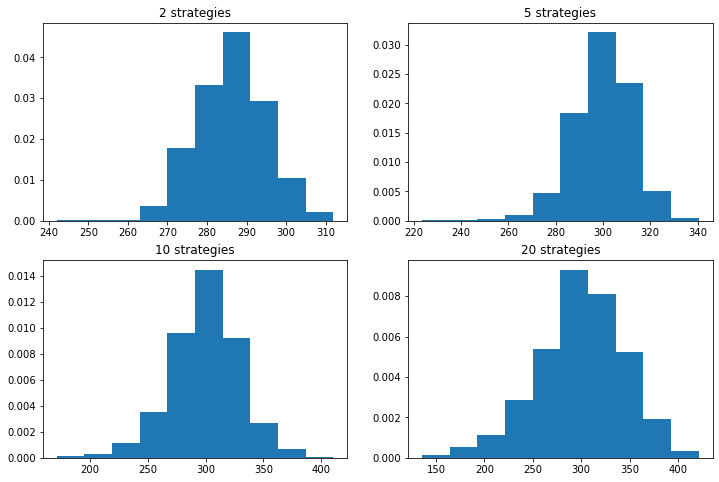

In [7]:
# plot number of people in bar frequency
plt.figure(figsize=(12,8))
for (i,s) in zip(range(len(s_list)),s_list):
    plt.subplot(221+i)
    plt.hist(num_mean[s],density=True)
    plt.title(f"{s_list[i]} strategies")
plt.show()

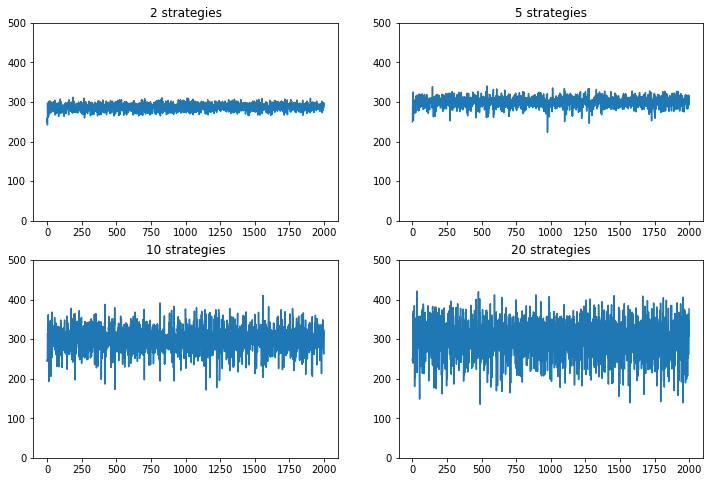

In [8]:
# plot number of people in bar vs time
plt.figure(figsize=(12,8))
for (i,s) in zip(range(len(s_list)),s_list):
    plt.subplot(221+i)
    plt.plot(num_mean[s])
    plt.title(f"{s_list[i]} strategies")
    plt.ylim([0, N])
plt.show()

### Effect on number of memory steps
number of strategies: 2

In [9]:
# simulations
num_sample_1=dict.fromkeys(m_list,[])
num_mean_1=dict.fromkeys(m_list,[])
N_ag = 500
N_sample = 2
for m in m_list:
    tmp_num = []
    for sample in range(N_sample):
        cur_game = BarGame(iter_num=2000, N=N_ag, m=m, s=2)
        cur_game.runGame()
        num_bar = cur_game.getNumberofPeopleInBar()
        tmp_num.append(num_bar)
    num_sample_1[m]=tmp_num

In [10]:
for m in m_list:
    tmp_list = []
    for i in range(2000):
        tmp = 0
        for j in range(N_sample):
            tmp += num_sample_1[m][j][i]
        tmp_list.append(tmp/N_sample)
    num_mean_1[m]=tmp_list

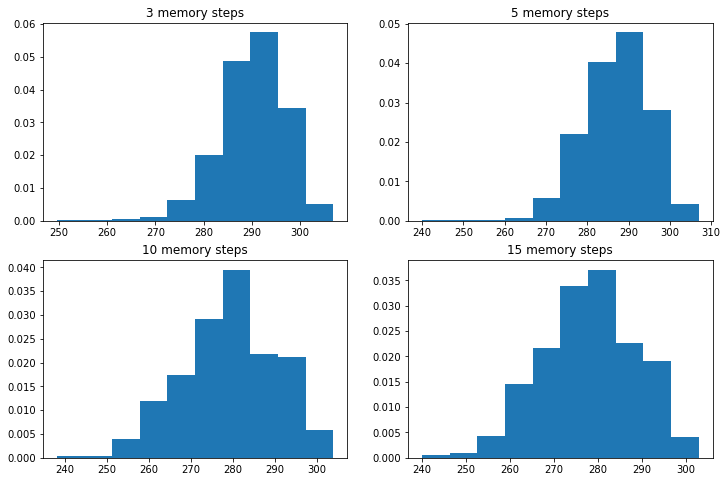

In [11]:
# plot number of people in bar frequency
plt.figure(figsize=(12,8))
for (m,i) in zip(m_list,range(len(m_list))):
    plt.subplot(221+i)
    plt.hist(num_mean_1[m],density=True)
    plt.title(f"{m_list[i]} memory steps")
plt.show()

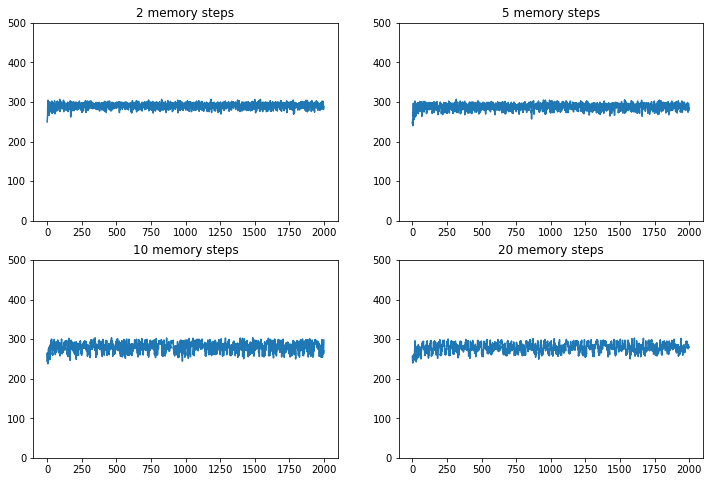

In [13]:
# plot number of people in bar vs time
plt.figure(figsize=(12,8))
for (i,m) in zip(range(len(m_list)),m_list):
    plt.subplot(221+i)
    plt.plot(num_mean_1[m])
    plt.title(f"{s_list[i]} memory steps")
    plt.ylim([0, N])
plt.show()

## Assumption 2: Either comfortable or uncomfortable

### Effect on number of strategies
number of memory step: 3

In [14]:
# simulations
num_sample_2=dict.fromkeys(s_list,[])
num_mean_2=dict.fromkeys(s_list,[])
N_ag = 500
N_sample = 2
for s in s_list:
    tmp_num = []
    for sample in range(N_sample):
        cur_game = BarGame(iter_num=2000, N=N_ag, m=3, s=s, cal_benefit=1)
        cur_game.runGame()
        num_bar = cur_game.getNumberofPeopleInBar()
        tmp_num.append(num_bar)
    num_sample_2[s]=tmp_num

In [15]:
for s in s_list:
    tmp_list = []
    for i in range(2000):
        tmp = 0
        for j in range(N_sample):
            tmp += num_sample_2[s][j][i]
        tmp_list.append(tmp/N_sample)
    num_mean_2[s]=tmp_list

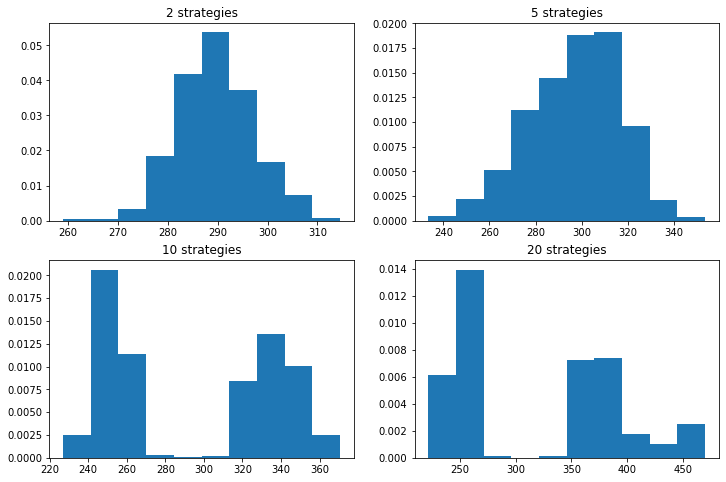

In [16]:
# plot number of people in bar frequency
plt.figure(figsize=(12,8))
for (i,s) in zip(range(len(s_list)),s_list):
    plt.subplot(221+i)
    plt.hist(num_mean_2[s],density=True)
    plt.title(f"{s_list[i]} strategies")
plt.show()

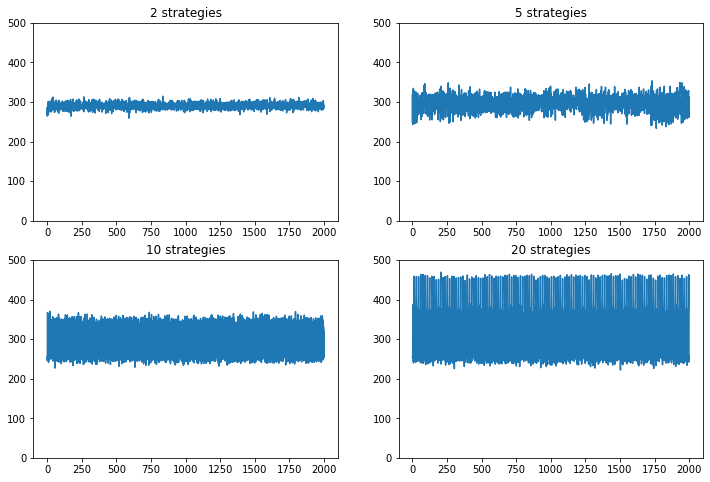

In [17]:
# plot number of people in bar vs time
plt.figure(figsize=(12,8))
for (i,s) in zip(range(len(s_list)),s_list):
    plt.subplot(221+i)
    plt.plot(num_mean_2[s])
    plt.title(f"{s_list[i]} strategies")
    plt.ylim([0, N])
plt.show()

### Effect on number of memory steps
number of strategies: 2